# **Josué Emmanuel Flores Mendoza A00833132**

 **Parte 1: Cargar datos, verificarlos y analizar features importantes**

In [12]:
# from google.colab import drive

# drive.mount("/content/gdrive")
# !pwd # directorio de trabajo

In [13]:
# %cd "/content/gdrive/MyDrive/Actividades IA avanzada/Módulo ML/Portafolio 2"
# !ls # Lista de archivos ubicados en el folder

In [14]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.model_selection import learning_curve


In [15]:
# Cargar dataframe
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Columns

*   age: Age of the patient (in years)
*   sex: Sex of the patient (1 = male, 0 = female)
*   cp: Chest pain type (1-4) Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
*   trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
*   chol: Serum cholesterol in mg/dl
*   fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: Resting electrocardiographic results (0-2)
*   thalach: Maximum heart rate achieved
*   exang: Exercise-induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest
*   slope: ST slope (0 = upsloping; 1 = flat; 2 = downsloping)
*   ca: Number of major vessels colored by fluoroscopy (0-4)
*   thal: Thalasemia (1 = Normal; 2 = Fixed defect; 3 = reversible defect)
*   target: If patient have heart-disease (1 = true, 0 = false)



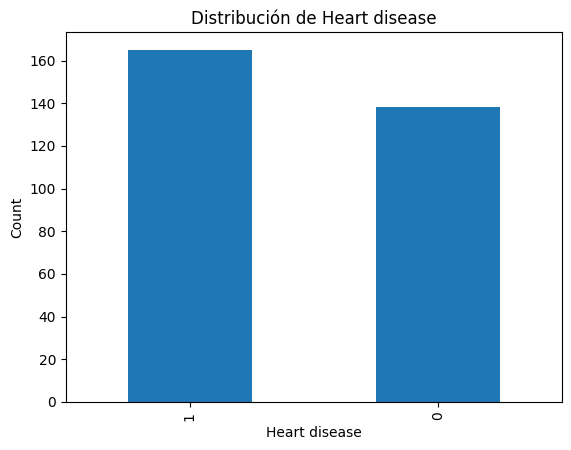

In [17]:
# Ver la distribución de la columna 'cp'
df['target'].value_counts().plot(kind='bar')
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.title('Distribución de Heart disease')
plt.show()



**Descripción de la selección de datos:**

Los datos estan muy bien distribuidos, se pueden encontrar gran cantidad de datos para ambos casos


Procederé a graficar los datos para identificar posibles relaciones entre las características (features) y la variable objetivo (label). Adicionalmente, calcularé la correlación de cada una de las características con la variable objetivo para determinar cuáles son las características más relevantes del conjunto de datos.

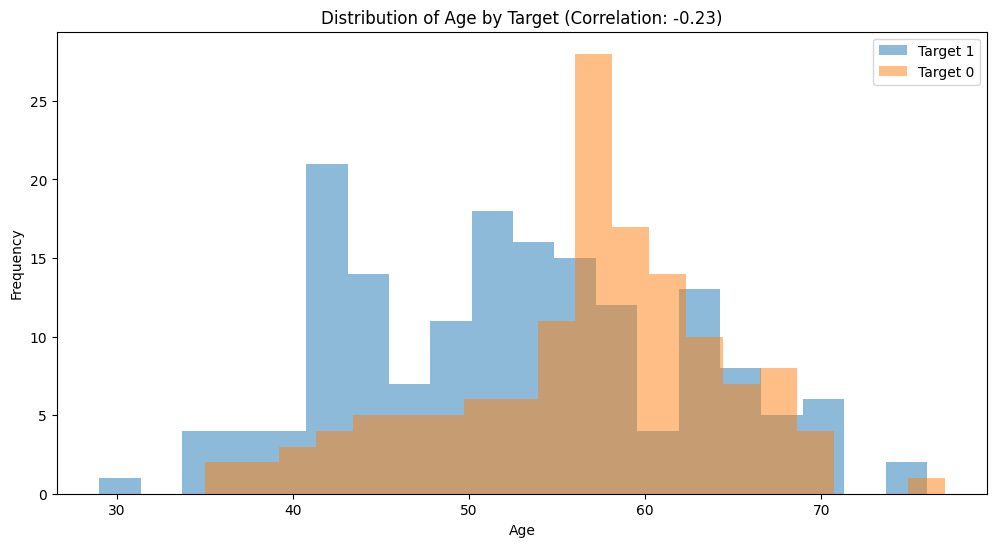

In [18]:
# Histogramas para comparar la distribución de la edad
correlation_age = df[['target', 'age']].corr().iloc[0, 1]
plt.figure(figsize=(12, 6))
for target_type in df['target'].unique():
    plt.hist(df[df['target'] == target_type]['age'], bins=20, alpha=0.5, label=f'Target {target_type}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(f'Distribution of Age by Target (Correlation: {correlation_age:.2f})')
plt.legend()
plt.show()

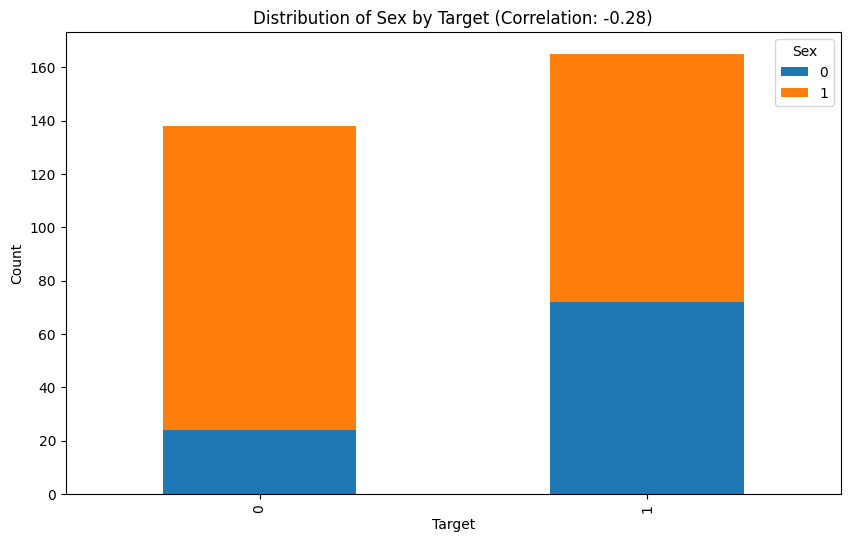

In [19]:
# Gráfico de distribución de sexo por target
correlation_sex = df[['target', 'sex']].corr().iloc[0, 1]
sex_counts = df.groupby(['target', 'sex']).size().unstack()
sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Sex by Target (Correlation: {correlation_sex:.2f})')
plt.legend(title='Sex')
plt.show()




<Figure size 1200x600 with 0 Axes>

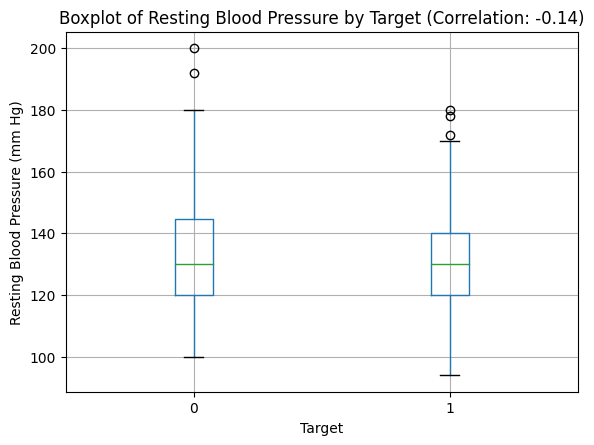

In [20]:
# Gráfico de caja para presión arterial en reposo
correlation_trestbps = df[['target', 'trestbps']].corr().iloc[0, 1]
plt.figure(figsize=(12, 6))
df.boxplot(column='trestbps', by='target')
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.title(f'Boxplot of Resting Blood Pressure by Target (Correlation: {correlation_trestbps:.2f})')
plt.suptitle('')
plt.show()


<Figure size 1200x600 with 0 Axes>

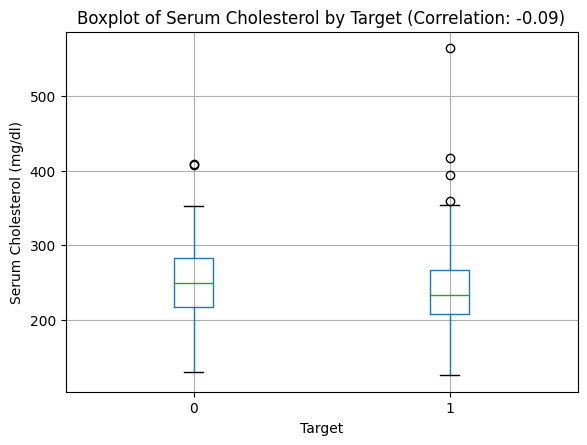

In [21]:
# Gráfico de caja para colesterol
correlation_chol = df[['target', 'chol']].corr().iloc[0, 1]
plt.figure(figsize=(12, 6))
df.boxplot(column='chol', by='target')
plt.xlabel('Target')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.title(f'Boxplot of Serum Cholesterol by Target (Correlation: {correlation_chol:.2f})')
plt.suptitle('')
plt.show()


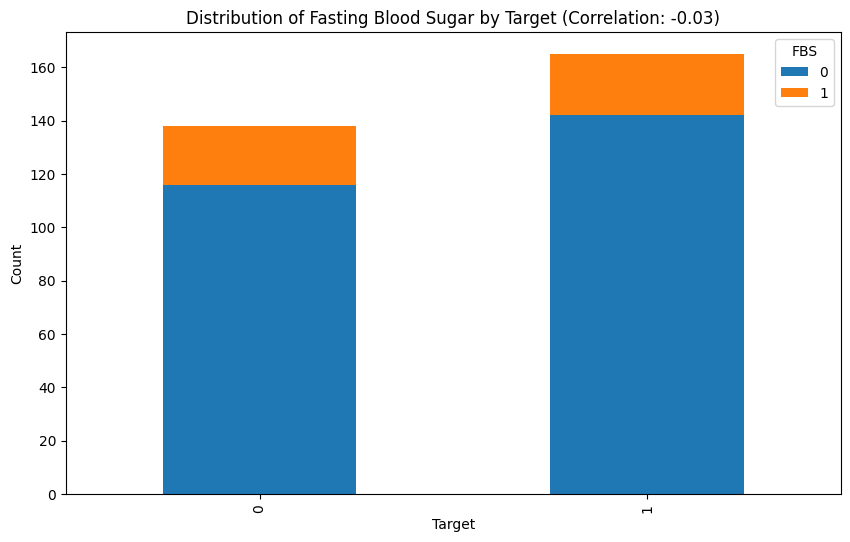

In [22]:
# Contar la frecuencia de azúcar en sangre en ayunas por target
correlation_fbs = df[['target', 'fbs']].corr().iloc[0, 1]
fbs_counts = df.groupby(['target', 'fbs']).size().unstack()
fbs_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Fasting Blood Sugar by Target (Correlation: {correlation_fbs:.2f})')
plt.legend(title='FBS')
plt.show()


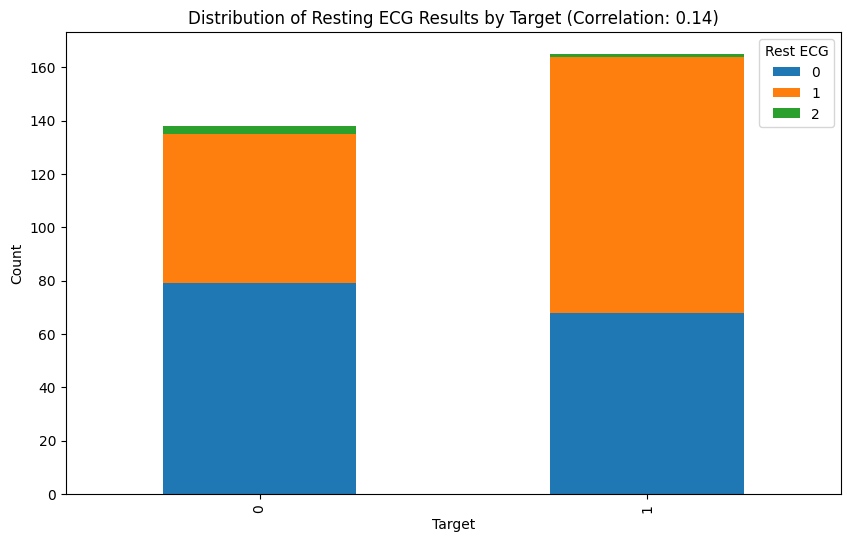

In [23]:
# # Gráfico de distribución De electrocardiográficos por target
restecg_counts = df.groupby(['target', 'restecg']).size().unstack()
correlation_restecg = df[['target', 'restecg']].corr().iloc[0, 1]
restecg_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Resting ECG Results by Target (Correlation: {correlation_restecg:.2f})')
plt.legend(title='Rest ECG')
plt.show()


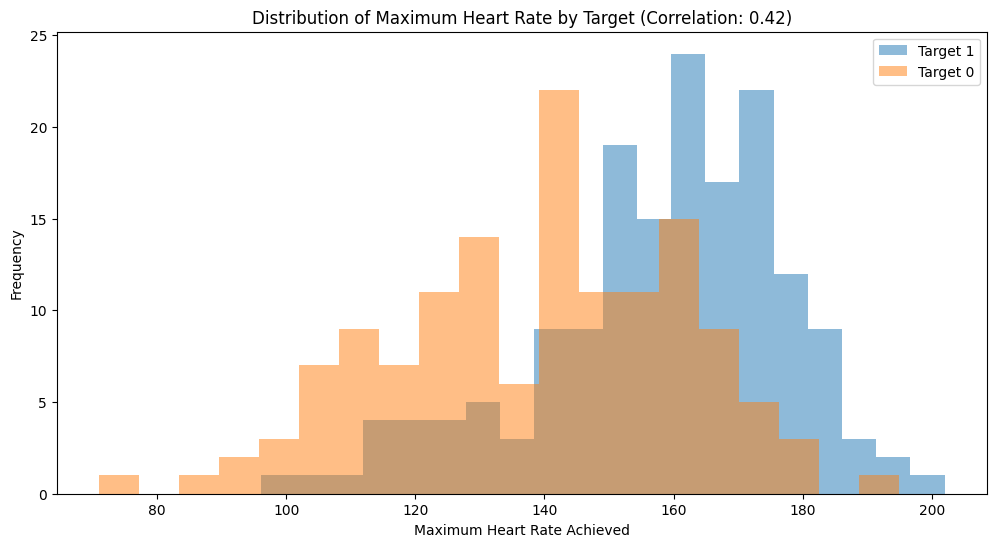

In [24]:
# Histogramas para comparar la distribución de la frecuencia cardíaca máxima
correlation_thalach = df[['target', 'thalach']].corr().iloc[0, 1]
plt.figure(figsize=(12, 6))
for target_type in df['target'].unique():
    plt.hist(df[df['target'] == target_type]['thalach'], bins=20, alpha=0.5, label=f'Target {target_type}')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title(f'Distribution of Maximum Heart Rate by Target (Correlation: {correlation_thalach:.2f})')
plt.legend()
plt.show()

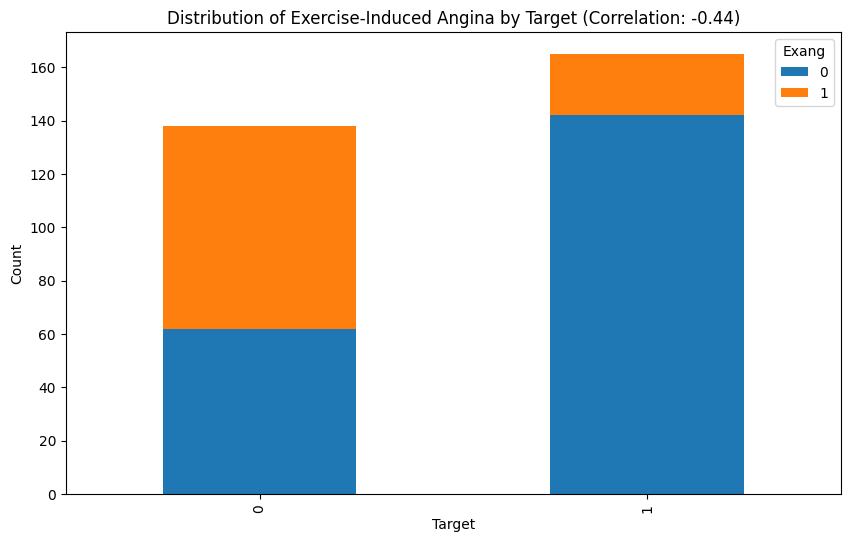

In [25]:
# Contar la frecuencia de angina inducida por ejercicio por target
correlation_exang = df[['target', 'exang']].corr().iloc[0, 1]
exang_counts = df.groupby(['target', 'exang']).size().unstack()
exang_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Exercise-Induced Angina by Target (Correlation: {correlation_exang:.2f})')
plt.legend(title='Exang')
plt.show()


<Figure size 1200x600 with 0 Axes>

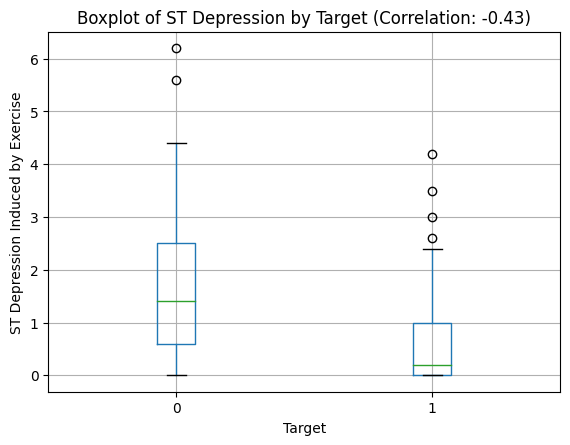

In [26]:
# Gráfico de caja para depresión del ST inducida por ejercicio por target
correlation_oldpeak = df[['target', 'oldpeak']].corr().iloc[0, 1]
plt.figure(figsize=(12, 6))
df.boxplot(column='oldpeak', by='target')
plt.xlabel('Target')
plt.ylabel('ST Depression Induced by Exercise')
plt.title(f'Boxplot of ST Depression by Target (Correlation: {correlation_oldpeak:.2f})')
plt.suptitle('')
plt.show()



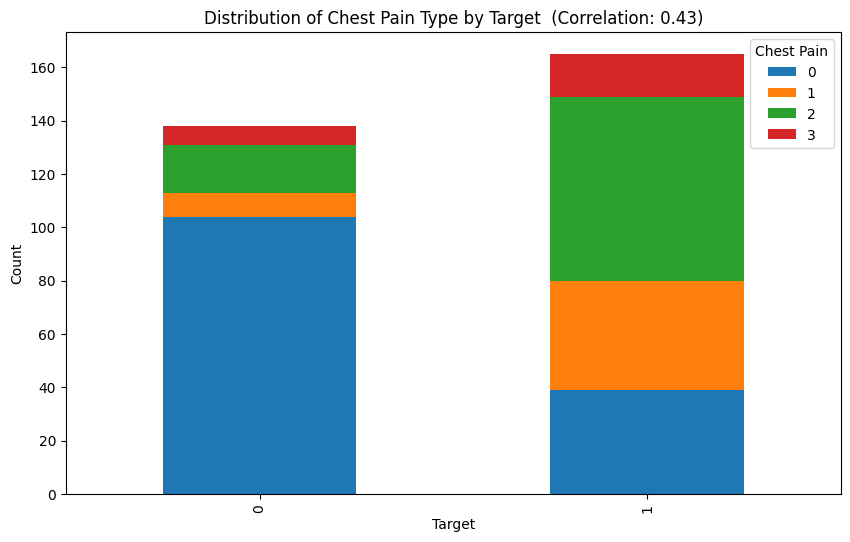

In [27]:
# Gráfico de distribución de dolor en el pecho por target
target_counts = df.groupby(['target', 'cp']).size().unstack()
correlation_target = df[['target', 'cp']].corr().iloc[0, 1]
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Chest Pain Type by Target  (Correlation: {correlation_target:.2f})')
plt.legend(title='Chest Pain')
plt.show()



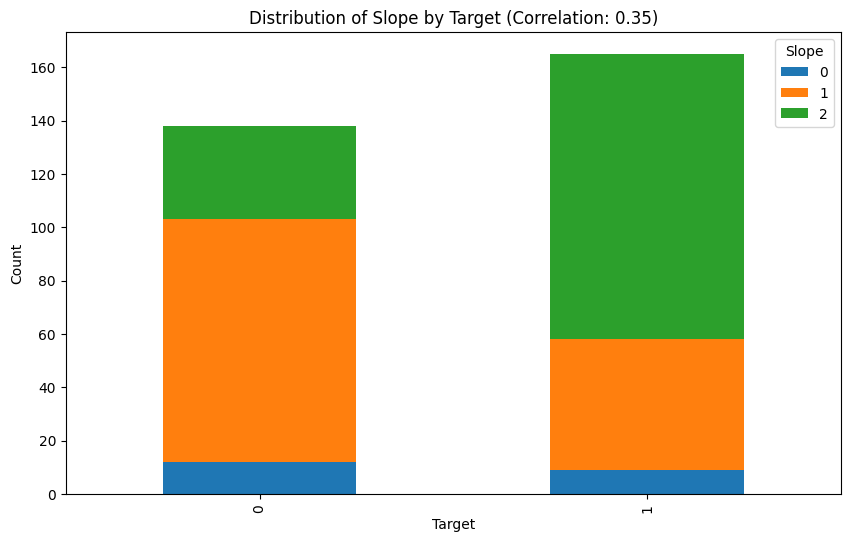

In [28]:
# Gráfico de Pendiente (Slope) por target
target_counts = df.groupby(['target', 'slope']).size().unstack()
correlation_target = df[['target', 'slope']].corr().iloc[0, 1]
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Slope by Target (Correlation: {correlation_target:.2f})')
plt.legend(title='Slope')
plt.show()


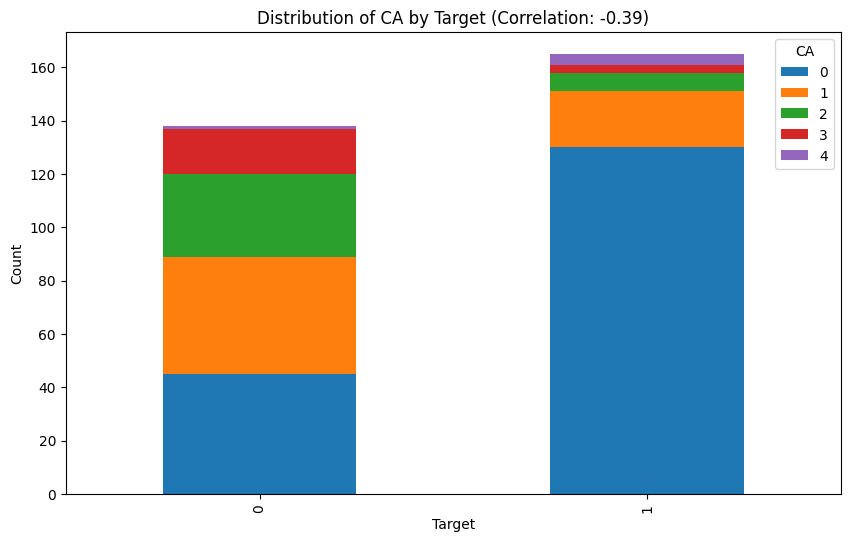

In [29]:
# Gráfico de distribución de CA por target
target_counts = df.groupby(['target', 'ca']).size().unstack()
correlation_target = df[['target', 'ca']].corr().iloc[0, 1]
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of CA by Target (Correlation: {correlation_target:.2f})')
plt.legend(title='CA')
plt.show()



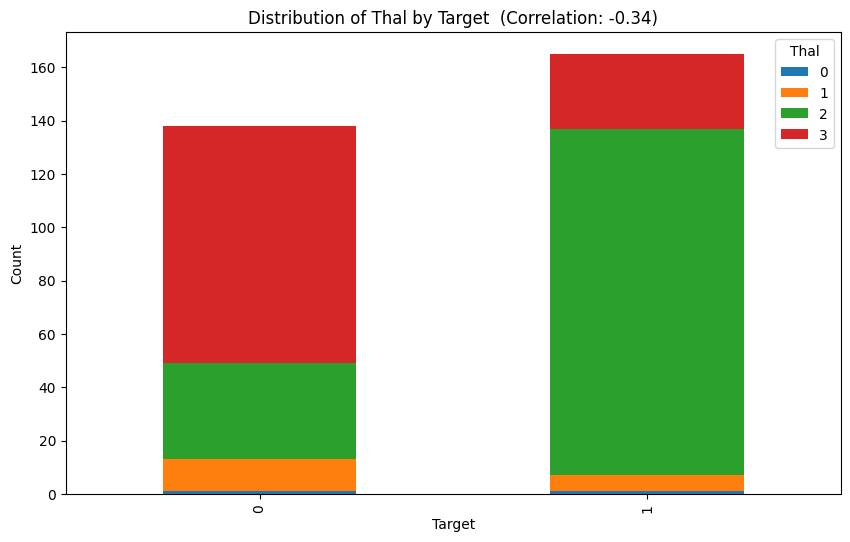

In [30]:
# Gráfico de Thal por target
target_counts = df.groupby(['target', 'thal']).size().unstack()
correlation_target = df[['target', 'thal']].corr().iloc[0, 1]
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title(f'Distribution of Thal by Target  (Correlation: {correlation_target:.2f})')
plt.legend(title='Thal')
plt.show()


Este es el análisis de las features en relación con el label (target)

1. **Edad (Age)**:
   - **Correlación**: Aunque la correlación es débil, la edad puede influir en la probabilidad de tener una enfermedad cardíaca debido las actividades hechas por cada grupo de individuos.
   - **Distribución**: La gráfica muestra picos diferentes entre las edades, lo cual puede significar una relación de acuerdo a la edad.

2. **Sexo (Sex)**:
   - **Correlación**: Aunque la correlación es débil, el sexo puede influir en la probabilidad de tener una enfermedad cardíaca debido a diferencias biológicas y hormonales entre hombres y mujeres.
   - **Distribución**: La gráfica muestra diferencias en la proporción de hombres y mujeres entre los grupos con y sin enfermedad cardíaca, lo que sugiere que el sexo podría ser un factor relevante.

2. **Presión arterial en reposo (Resting Blood Pressure)**
   - **Correlación**: Muy débil (-0.14), indicando una relación negativa muy débil.
   - **Distribución**: Las distribuciones de la presión arterial en reposo para ambos targets son bastante similares, lo que refuerza la idea de que este feature no es un predictor significativo.

3. **Colesterol sérico (Serum Cholesterol)**
   - **Correlación**: Muy débil (-0.09), indicando una relación negativa extremadamente débil.
   - **Distribución**: Las distribuciones de colesterol sérico para ambos targets son bastante similares, lo que refuerza la idea de que este feature no es un predictor significativo.

4. **Azúcar en sangre en ayunas (Fasting Blood Sugar)**
   - **Correlación**: Extremadamente débil (-0.03), indicando una relación negativa extremadamente débil.
   - **Distribución**: Las proporciones de azúcar en sangre en ayunas son similares en ambos grupos, lo que refuerza la idea de que este feature no es un predictor significativo.


3. **Tipo de dolor en el pecho (Chest Pain Type)**:
   - **Correlación**: La correlación es moderada (0.43), indicando una relación significativa.
   - **Distribución**: La gráfica muestra que los tipos de dolor en el pecho varían considerablemente entre los grupos, lo que sugiere que ciertos tipos de dolor en el pecho están más asociados con la enfermedad cardíaca.

4. **Resultados electrocardiográficos en reposo (Resting ECG Results)**:
   - **Correlación**: La correlación es moderada (0.14), indicando una relación débil pero presente.
   - **Distribución**: La gráfica muestra diferencias en los resultados electrocardiográficos entre los grupos, lo que sugiere que este feature podría ayudar a identificar la presencia de enfermedad cardíaca.

5. **Frecuencia cardíaca máxima alcanzada (Maximum Heart Rate Achieved)**:
   - **Correlación**: La correlación es moderada (0.42), indicando una relación significativa.
   - **Distribución**: La gráfica muestra diferencias claras en la frecuencia cardíaca máxima alcanzada entre los grupos, lo que sugiere que este feature es un buen predictor de la enfermedad cardíaca.

5. **Angina inducida por ejercicio (Exercise-Induced Angina)**:
   - **Correlación**: La correlación es moderada (-0.44), indicando una relación significativa.
   - **Distribución**: La gráfica muestra diferencias en la presencia de angina inducida por ejercicio entre los grupos, lo que sugiere que este feature es relevante para predecir la enfermedad cardíaca.

6. **Depresión del segmento ST inducida por ejercicio (ST Depression Induced by Exercise)**:
   - **Correlación**: La correlación es moderada (-0.43), indicando una relación significativa.
   - **Distribución**: La gráfica muestra diferencias en la depresión del segmento ST entre los grupos, lo que sugiere que este feature es un buen predictor de la enfermedad cardíaca.

7. **Slope (Pendiente del segmento ST)**
   - **Correlación**: La correlación es moderada (0.35), indicando una relación significativa.
   - **Distribución**: La gráfica muestra una clara inclinación a que los pacientes con pendiente descendente (downsloping) tienen problemas cardiacos,
   
8. **Ca (Número de vasos principales coloreados por fluoroscopia)**:
   - **Correlación**: La correlación es moderada (-0.39), indicando una relación significativa.
   - **Distribución**: La gráfica muestra una clara inclinación a que los pacientes con cero vasos principales coloreados tienen problemas cardiacos.

9. **Thal (Talasemia)**:
  - **Correlación**: La correlación es moderada (-0.34), indicando una relación significativa.
   - **Distribución**: La gráfica muestra una clara inclinación a que los pacientes con Talasemia tipo 2 tienen problemas cardiacos.

En resumen, considero que las features relevantes son las siguientes:
- Sexo (Sex)
- Tipo de dolor en el pecho (Chest Pain Type)
- Resultados electrocardiográficos en reposo (Resting ECG Results)
- Frecuencia cardíaca máxima alcanzada (Maximum Heart Rate Achieved)
- Angina inducida por ejercicio (Exercise-Induced Angina)
- Depresión del segmento ST inducida por ejercicio (ST Depression Induced by Exercise)
- Slope (Pendiente del segmento ST)
- Ca (Número de vasos principales coloreados por fluoroscopia)
- Thal (Talasemia)

In [31]:
# Aplicar One-Hot Encoding a las columnas 'sex' y 'thal' y 'slope'
df_encoded = pd.get_dummies(df, columns=['sex', 'thal', 'slope'], prefix=['sex', 'thal', 'slope'])

# Mostrar las primeras filas del DataFrame transformado
print(df_encoded.head())

   age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  target  \
0   63   3       145   233    1        0      150      0      2.3   0       1   
1   37   2       130   250    0        1      187      0      3.5   0       1   
2   41   1       130   204    0        0      172      0      1.4   0       1   
3   56   1       120   236    0        1      178      0      0.8   0       1   
4   57   0       120   354    0        1      163      1      0.6   0       1   

   sex_0  sex_1  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0  False   True   False    True   False   False     True    False    False  
1  False   True   False   False    True   False     True    False    False  
2   True  False   False   False    True   False    False    False     True  
3  False   True   False   False    True   False    False    False     True  
4   True  False   False   False    True   False    False    False     True  


Parte 2: Dividir los datos en training set, validation set y test set.

In [32]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Establecemos las proporciones para cada conjunto
train_ratio = 0.75
validation_ratio = 0.25

# Primero, dividimos el DataFrame en conjunto de entrenamiento y conjunto de prueba
train_set, test_set = train_test_split(df_encoded, test_size=(1 - train_ratio), random_state=42)

train_set.head()
print(len(df))
print(len(train_set))
print(len(test_set))

303
227
76


In [33]:
# División de datos con one hot encoding

X_train = train_set[['age','sex_0','sex_1', 'cp', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope_0', 'slope_1', 'slope_2', 'ca', 'thal_1', 'thal_2', 'thal_3']]
y_train = train_set['target']



X_test = test_set[['age','sex_0','sex_1', 'cp', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope_0', 'slope_1', 'slope_2', 'ca', 'thal_1', 'thal_2', 'thal_3']]
y_test = test_set['target']


# División de datos completos

# X_train = train_set[['age','sex', 'cp', 'restecg', 'thalach',
#        'exang', 'oldpeak', 'slope', 'ca', 'thal']]
# y_train = train_set['target']



# X_test = test_set[['age', 'sex', 'cp', 'restecg', 'thalach',
#        'exang', 'oldpeak', 'slope', 'ca', 'thal']]
# y_test = test_set['target']



**Parte 3: Escalar los datos**

In [34]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Parte 4: Hacer regresión Logistica**

Exactitud en el conjunto de test: 0.88
Reporte de clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



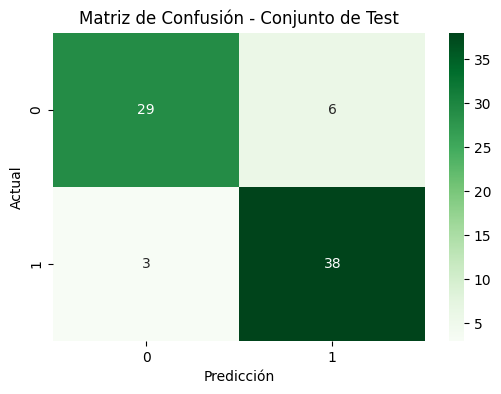

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir el modelo base
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


# Evaluación en el conjunto de test con el modelo
y_test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Exactitud en el conjunto de test: {test_accuracy:.2f}")
print("Reporte de clasificación en el conjunto de test:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión para el conjunto de validación
conf_matrix_val = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Conjunto de Test')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()


Fitting 10 folds for each of 96 candidates, totalling 960 fits
Mejores hiperparámetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Exactitud en el conjunto de test: 0.88
Reporte de clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



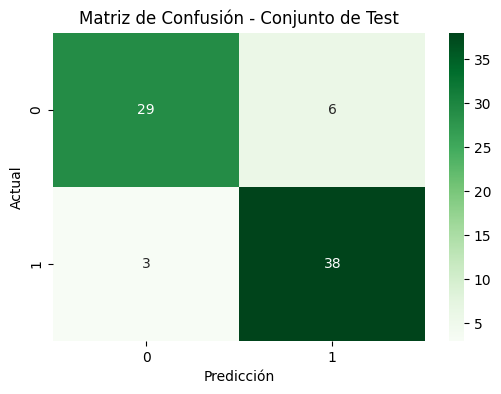

In [36]:

# Definir el modelo base
model = LogisticRegression(random_state=42)

# Definir el rango de hiperparámetros para ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500, 1000]
}

# Configurar la búsqueda en cuadrícula de hiperparámetros
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',  # Métrica de evaluación
    n_jobs=-1,  # Utilizar todos los núcleos disponibles para paralelizar
    verbose=1  # Mostrar información sobre el progreso
)

# Realizar la búsqueda en cuadrícula de hiperparámetros con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Mejor combinación de hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluación en el conjunto de test con el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Exactitud en el conjunto de test: {test_accuracy:.2f}")
print("Reporte de clasificación en el conjunto de test:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión para el conjunto de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Conjunto de Test')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()


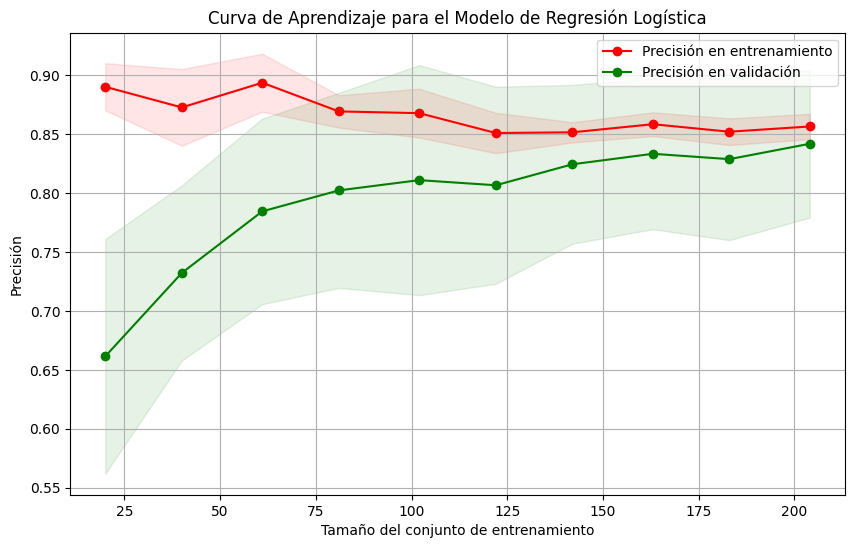

In [37]:

# Definir el modelo base
model = LogisticRegression(random_state=42, solver='saga', penalty='l2', C=0.1)

# Obtener la curva de aprendizaje
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular el promedio y la desviación estándar de los resultados
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en entrenamiento")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Precisión en validación")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.title("Curva de Aprendizaje para el Modelo de Regresión Logística")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid()
plt.show()